In [85]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta, binom

### 3.3.2
#### Binom distribution - Likelihood

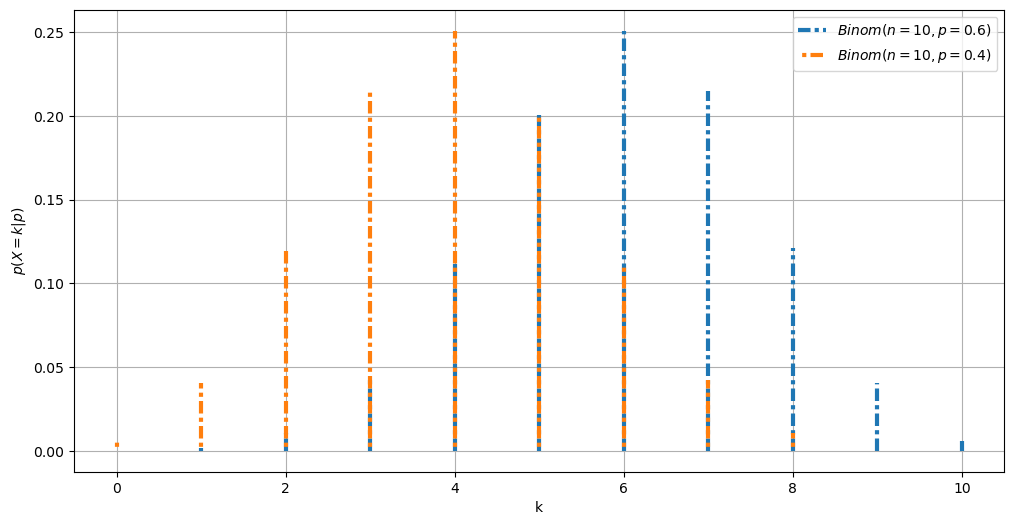

In [144]:
plt.figure(figsize=(12, 6))
x = np.arange(0, 11)
plt.vlines(
    x,
    np.zeros_like(x),
    binom.pmf(np.arange(0, 11), 10, 0.6),
    color="C0",
    label=r"$Binom(n=10, p=0.6)$",
    ls=(0, (3, 1, 1, 1)),
    lw=3
)
plt.vlines(
    x,
    np.zeros_like(x),
    binom.pmf(np.arange(0, 11), 10, 0.4),
    color="C1",
    label=r"$Binom(n=10, p=0.4)$",
    ls=(3, (3, 1, 1, 1)),
    lw=3
)

plt.xlabel("k")
plt.ylabel(r"$p(X=k|p)$")
plt.grid()
plt.legend()

#### Beta distribution - prior

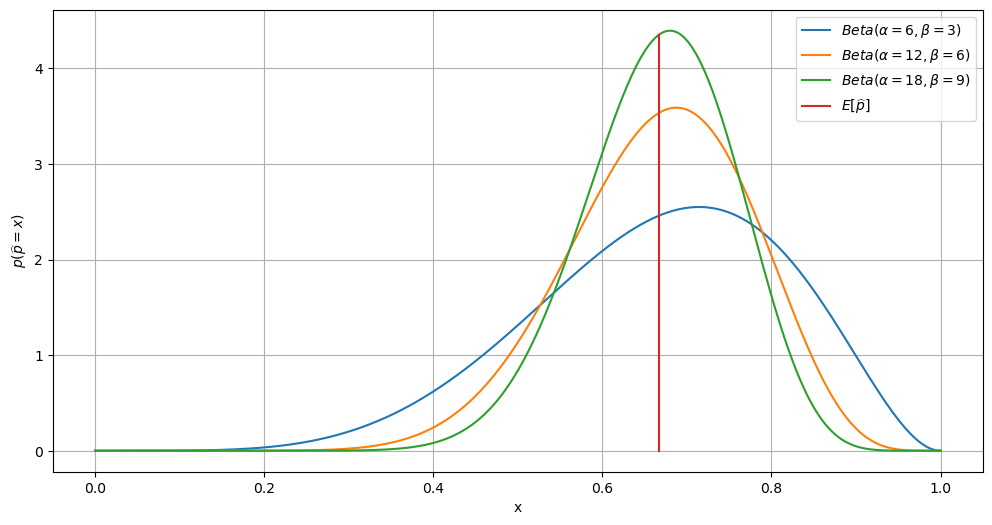

In [143]:
plt.figure(figsize=(12, 6))
# plt.subplot(100, 1, 1)
for b in [3, 6, 9]:
    a = 2 * b
    x = np.arange(0, 1.001, 0.001)
    y = beta.pdf(x, a, b)
    var = a*b/((a+b+1)*(a+b)^2)
    plt.plot(x, y, label=rf"$Beta(\alpha={a}, \beta={b})$")

plt.plot([a / (a + b), a / (a + b)], [0, beta.pdf(a / (a + b), a, b)], label=r"$E[\widehat{{p}}]$")

plt.xlabel("x")
plt.ylabel(r"$p(\widehat{p}=x)$")
plt.grid()
plt.legend()

#### Beta prior (6, 3) to beta posterior

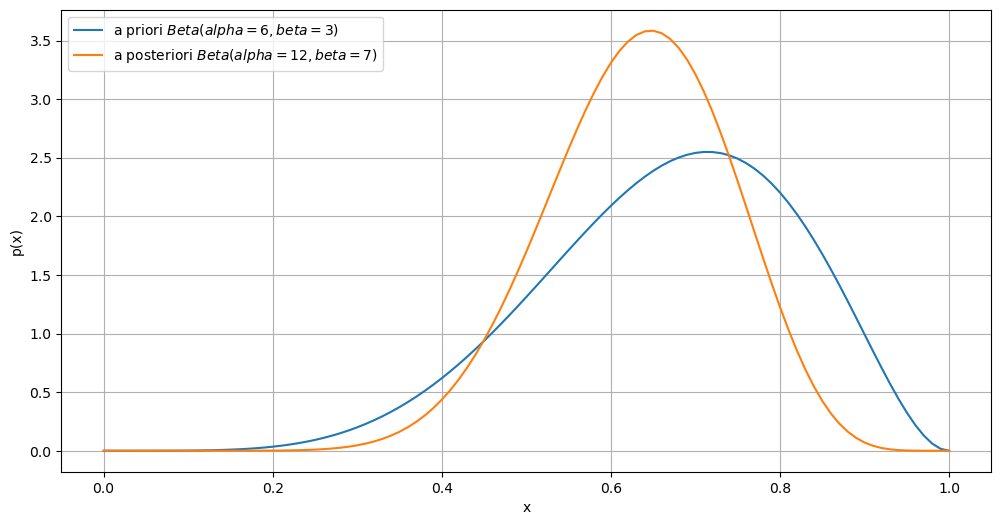

In [151]:
plt.figure(figsize=(12, 6))
a = 6
b = 3
x = np.arange(0, 1.01, 0.01)
y = beta.pdf(x, a, b)
plt.plot(x, y, color="C0", label=rf"a priori $Beta(alpha={a}, beta={b})$")

a = 12
b = 7
x = np.arange(0, 1.01, 0.01)
y = beta.pdf(x, a, b)
plt.plot(x, y, color="C1", label=rf"a posteriori $Beta(alpha={a}, beta={b})$")

plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid()
plt.legend()

#### Beta prior (1, 1) to posterior

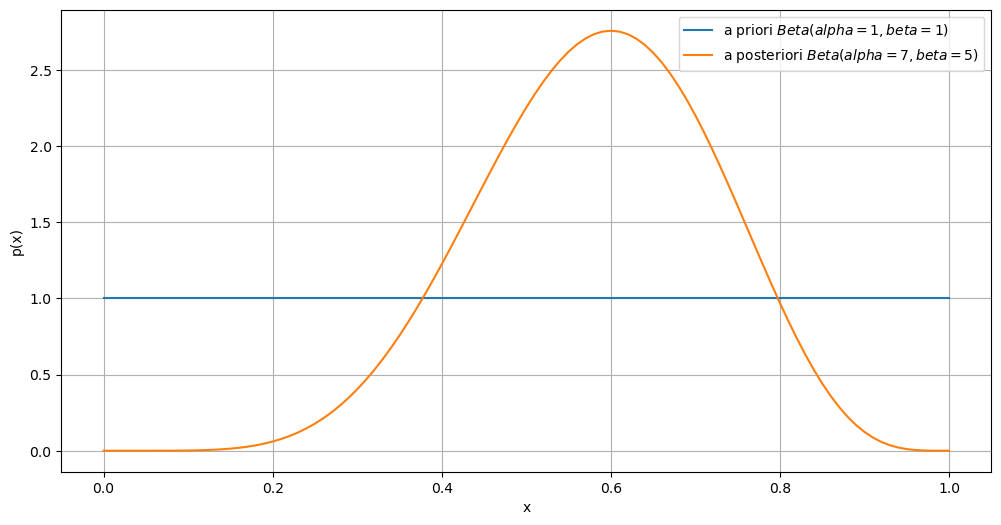

In [152]:
plt.figure(figsize=(12, 6))
a = 1
b = 1
x = np.arange(0, 1.01, 0.01)
y = beta.pdf(x, a, b)
plt.plot(x, y, color="C0", label=rf"a priori $Beta(alpha={a}, beta={b})$")

a += 6
b += 4
x = np.arange(0, 1.01, 0.01)
y = beta.pdf(x, a, b)
plt.plot(x, y, color="C1", label=rf"a posteriori $Beta(alpha={a}, beta={b})$")

plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid()
plt.legend()